In [1]:
import folium
import json

crime_gu = pd.read_csv('./data/seoul_crime_result.csv', encoding='utf-8')
geo_path = './data/03_skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

crime_gu.head()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
1,강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
2,강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
3,강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
4,관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [5]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data=crime_gu, columns=['구', '살인'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on = 'feature.id', fill_color='PuRd',
    legend_name='살인 발생 건수'
).add_to(my_map)

my_map

In [6]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data=crime_gu, columns=['구', '강간'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on = 'feature.id', fill_color='PuRd',
    legend_name='살인 발생 건수'
).add_to(my_map)

my_map

In [7]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = 'Stamen Toner')

folium.Choropleth(
    geo_data = geo_str,
    data=crime_gu, columns=['구', '폭력'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on = 'feature.id', fill_color='PuRd',
    legend_name='살인 발생 건수'
).add_to(my_map)

my_map

In [8]:
import numpy as np

crime_raw_data = pd.read_csv('./data/seoul_crime/2000년.csv',
                            usecols=[0,1,2,3], encoding = 'euc-kr')
crime_raw_data.headad()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [11]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index = ['구분'], columns=['죄종', '발생검거'], aggfunc = [np.sum])

crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [12]:
crime_station.columns = ['강간', '1', '강도', '2', '살인', '3', '절도', '4', '폭력', '5']
crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]

crime_station.head()

,강간,강도,살인,절도,폭력
구분,,,,,
강남,70,72,4,523,4345
강동,58,40,11,671,4333
강북,48,48,8,458,3446
강서,64,55,7,509,3988
관악,44,36,7,349,2658


In [15]:
crime_station['year'] = 2000
crime_station.head()

/Users/jungryolee/opt/anaconda3/envs/dss15/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


In [16]:
from glob import glob
glob('./data/seoul_crime/*')

['./data/seoul_crime/2016년.csv',
 './data/seoul_crime/2008년.csv',
 './data/seoul_crime/2004년.csv',
 './data/seoul_crime/2006년.csv',
 './data/seoul_crime/2014년.csv',
 './data/seoul_crime/2010년.csv',
 './data/seoul_crime/2002년.csv',
 './data/seoul_crime/2000년.csv',
 './data/seoul_crime/2012년.csv',
 './data/seoul_crime/2009년.csv',
 './data/seoul_crime/2017년.csv',
 './data/seoul_crime/2005년.csv',
 './data/seoul_crime/2007년.csv',
 './data/seoul_crime/2015년.csv',
 './data/seoul_crime/2011년.csv',
 './data/seoul_crime/2003년.csv',
 './data/seoul_crime/2001년.csv',
 './data/seoul_crime/2013년.csv']

In [17]:
file_list = glob('./data/seoul_crime/*')
file_list

['./data/seoul_crime/2016년.csv',
 './data/seoul_crime/2008년.csv',
 './data/seoul_crime/2004년.csv',
 './data/seoul_crime/2006년.csv',
 './data/seoul_crime/2014년.csv',
 './data/seoul_crime/2010년.csv',
 './data/seoul_crime/2002년.csv',
 './data/seoul_crime/2000년.csv',
 './data/seoul_crime/2012년.csv',
 './data/seoul_crime/2009년.csv',
 './data/seoul_crime/2017년.csv',
 './data/seoul_crime/2005년.csv',
 './data/seoul_crime/2007년.csv',
 './data/seoul_crime/2015년.csv',
 './data/seoul_crime/2011년.csv',
 './data/seoul_crime/2003년.csv',
 './data/seoul_crime/2001년.csv',
 './data/seoul_crime/2013년.csv']

In [18]:
for each_file in file_list:
    print(each_file)

./data/seoul_crime/2016년.csv
./data/seoul_crime/2008년.csv
./data/seoul_crime/2004년.csv
./data/seoul_crime/2006년.csv
./data/seoul_crime/2014년.csv
./data/seoul_crime/2010년.csv
./data/seoul_crime/2002년.csv
./data/seoul_crime/2000년.csv
./data/seoul_crime/2012년.csv
./data/seoul_crime/2009년.csv
./data/seoul_crime/2017년.csv
./data/seoul_crime/2005년.csv
./data/seoul_crime/2007년.csv
./data/seoul_crime/2015년.csv
./data/seoul_crime/2011년.csv
./data/seoul_crime/2003년.csv
./data/seoul_crime/2001년.csv
./data/seoul_crime/2013년.csv


In [19]:
crime_raw_data = pd.read_csv('./data/seoul_crime/2000년.csv',
                            usecols=[0,1,2,3], encoding = 'euc-kr')
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index = ['구분'], columns=['죄종', '발생검거'], aggfunc = [np.sum])

crime_station.columns = crime_station.columns.droplevel([0,1,2])

crime_station.columns = ['강간', '1', '강도', '2', '살인', '3', '절도', '4', '폭력', '5']
crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]

crime_station['year'] = 2000
crime_station.head()

,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


In [22]:
for each_file in file_list:
    print(each_file.split('/')[-1][:4])

2016
2008
2004
2006
2014
2010
2002
2000
2012
2009
2017
2005
2007
2015
2011
2003
2001
2013


In [23]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding = 'euc-kr')

    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index = ['구분'], columns=['죄종', '발생검거'], aggfunc = [np.sum])

    crime_station.columns = crime_station.columns.droplevel([0,1,2])

    crime_station.columns = ['강간', '1', '강도', '2', '살인', '3', '절도', '4', '폭력', '5']
    crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]

    crime_station['year'] = each_file.split('/')[-1][:4]
    crime_station.reset_index(inplace = True)
    crime_station_t.append(crime_station)

In [24]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,강도,살인,절도,폭력,year
0,강남,269.0,26.0,3.0,1129.0,2096.0,2016
1,강동,152.0,13.0,5.0,902.0,2201.0,2016
2,강북,159.0,4.0,6.0,672.0,2482.0,2016
3,강서,239.0,10.0,10.0,1070.0,2768.0,2016
4,관악,264.0,10.0,7.0,937.0,2707.0,2016


In [25]:
crime_total_murder = crime_total.pivot('year', '구분', '살인')
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

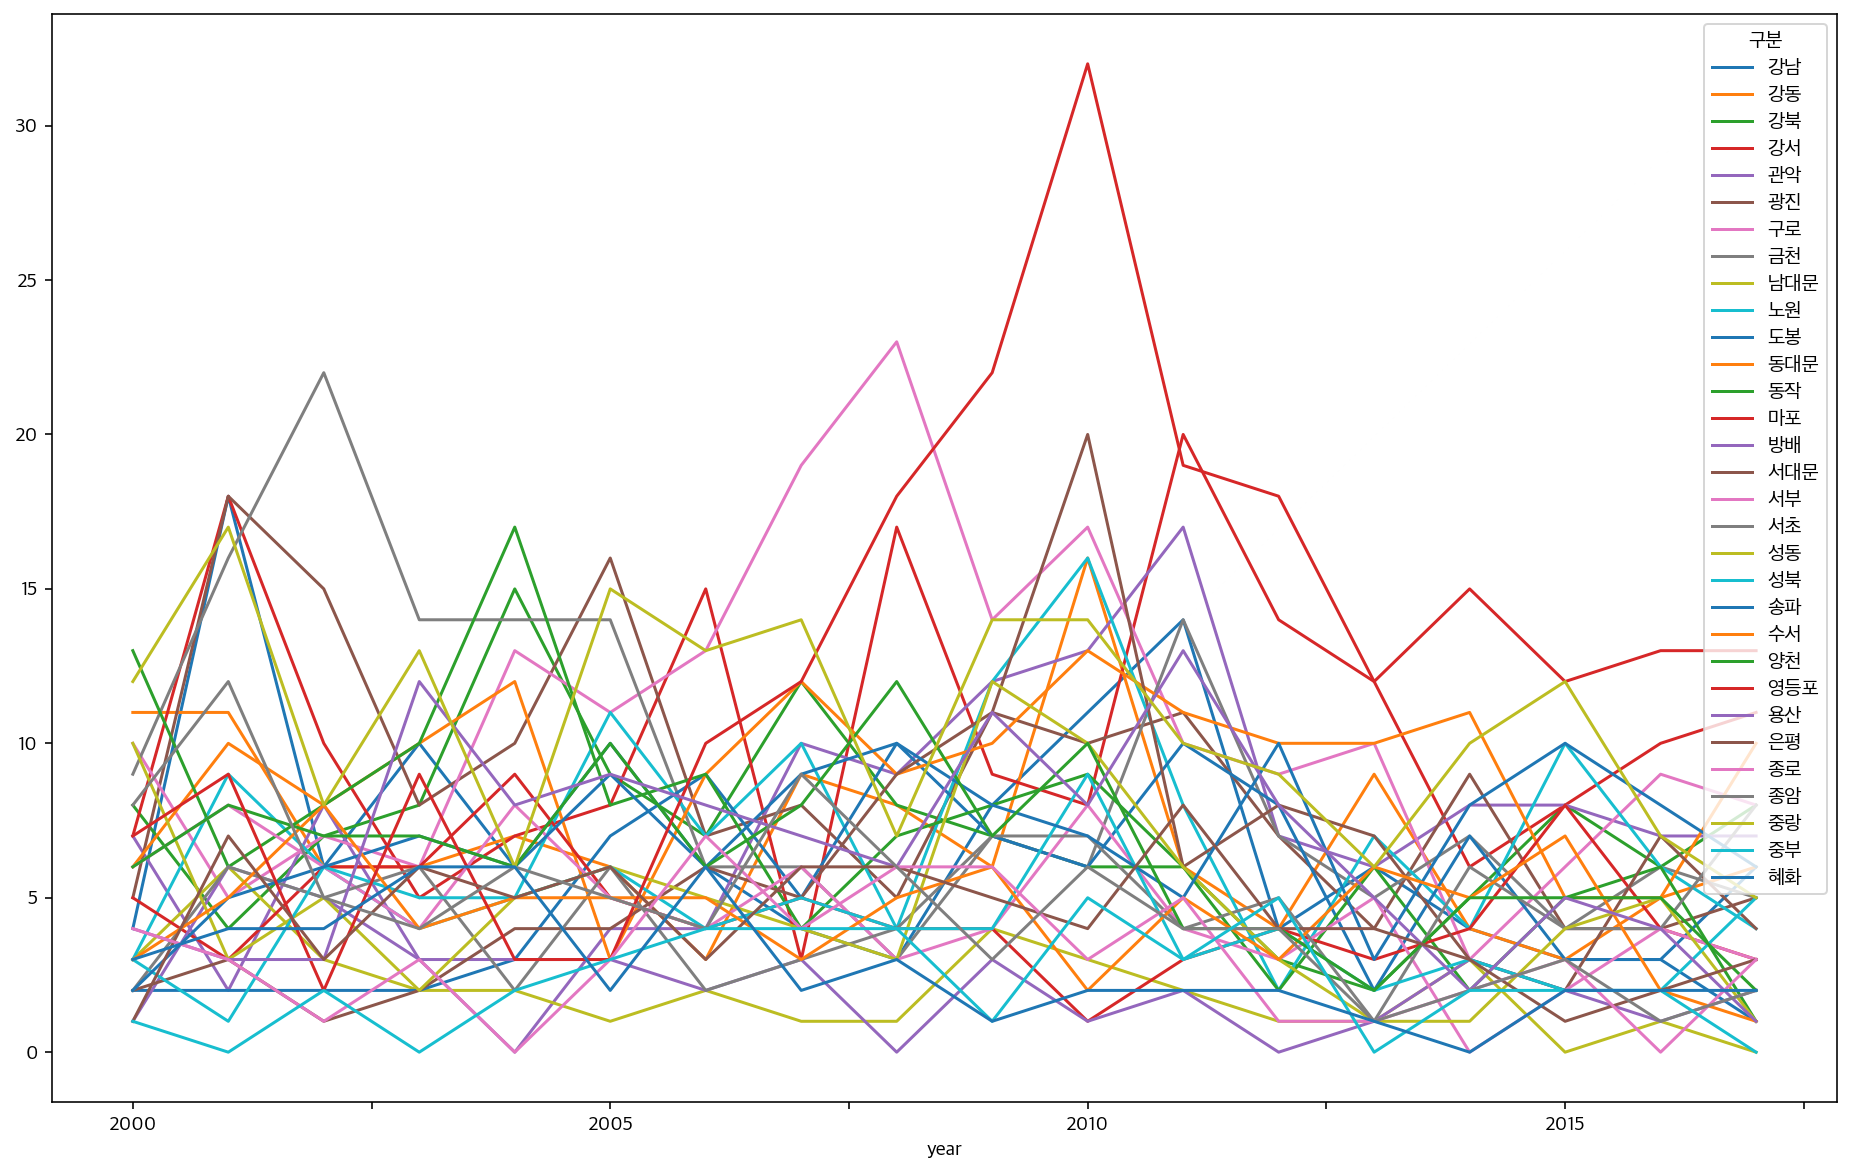

In [34]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

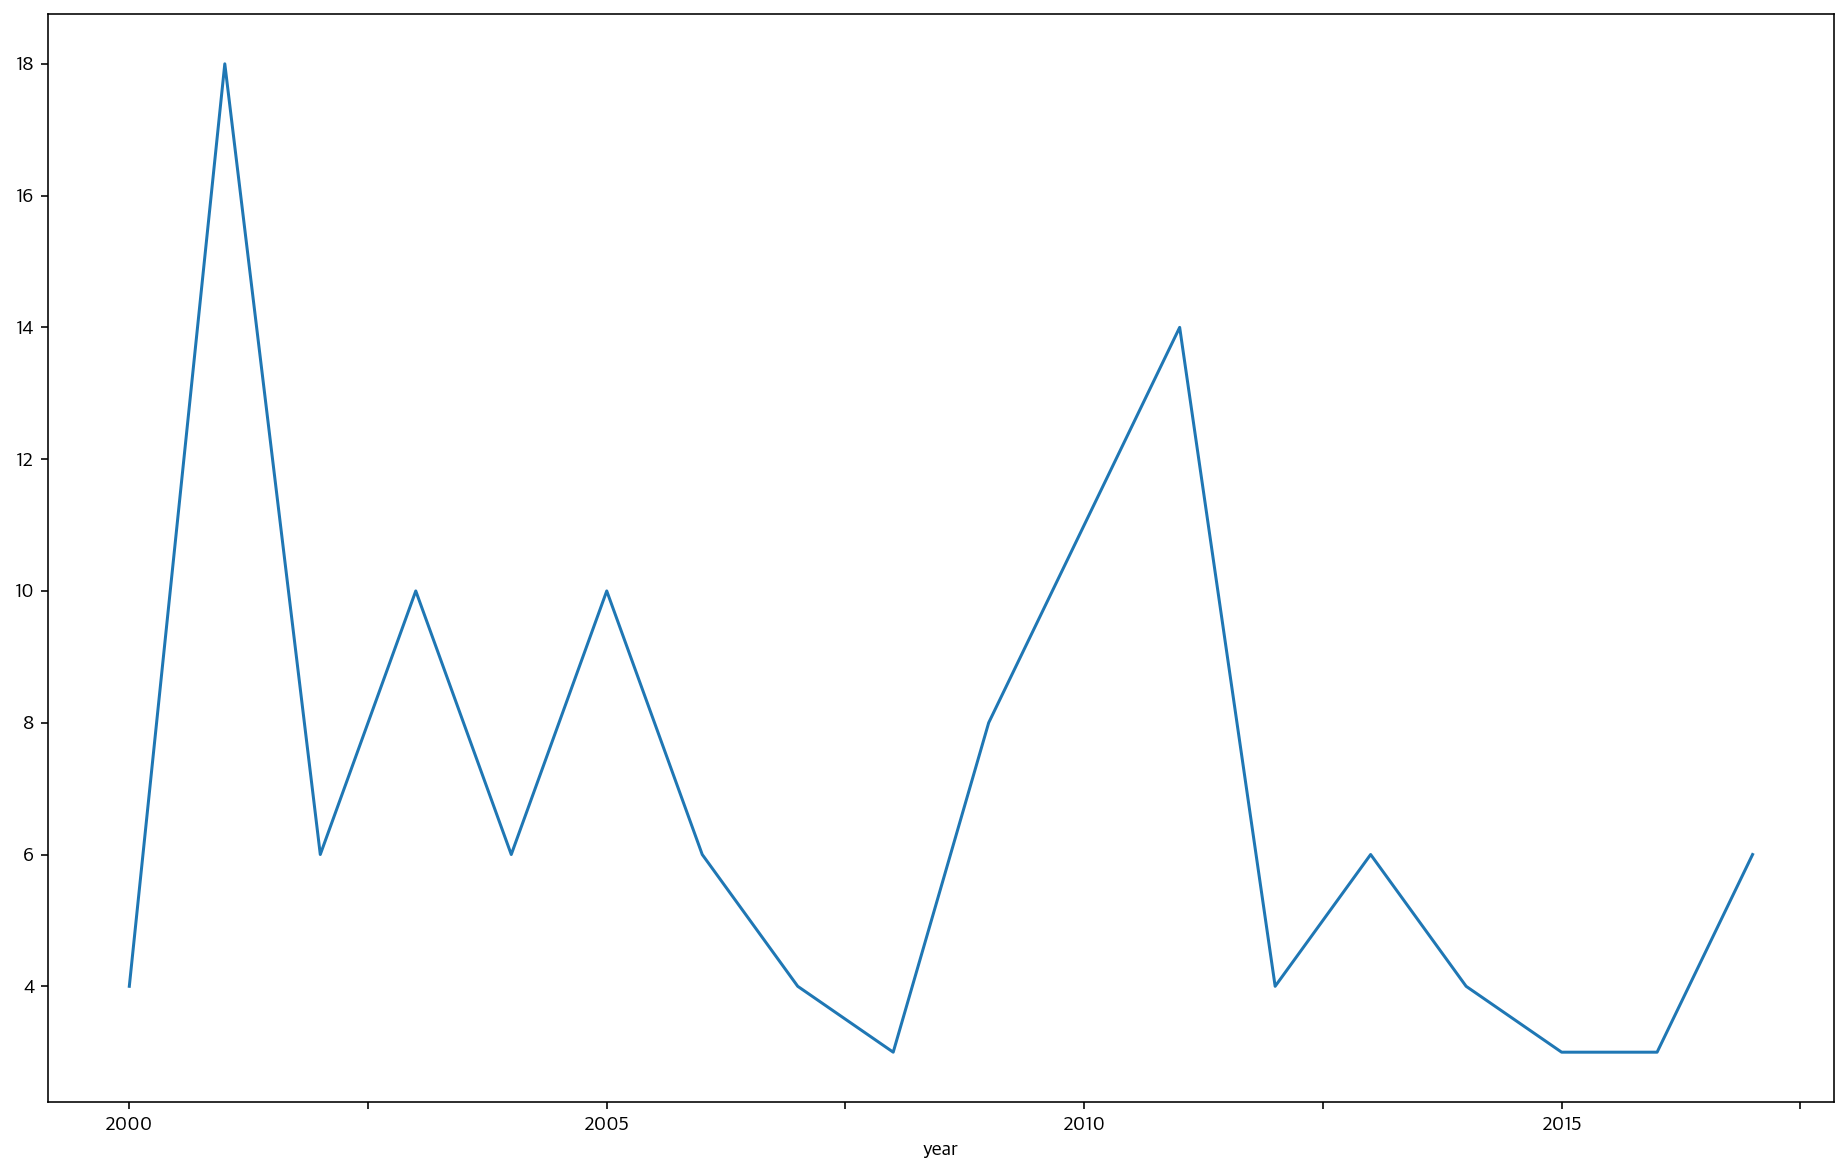

In [29]:
crime_total_murder['강남'].plot(figsize=(16,10));

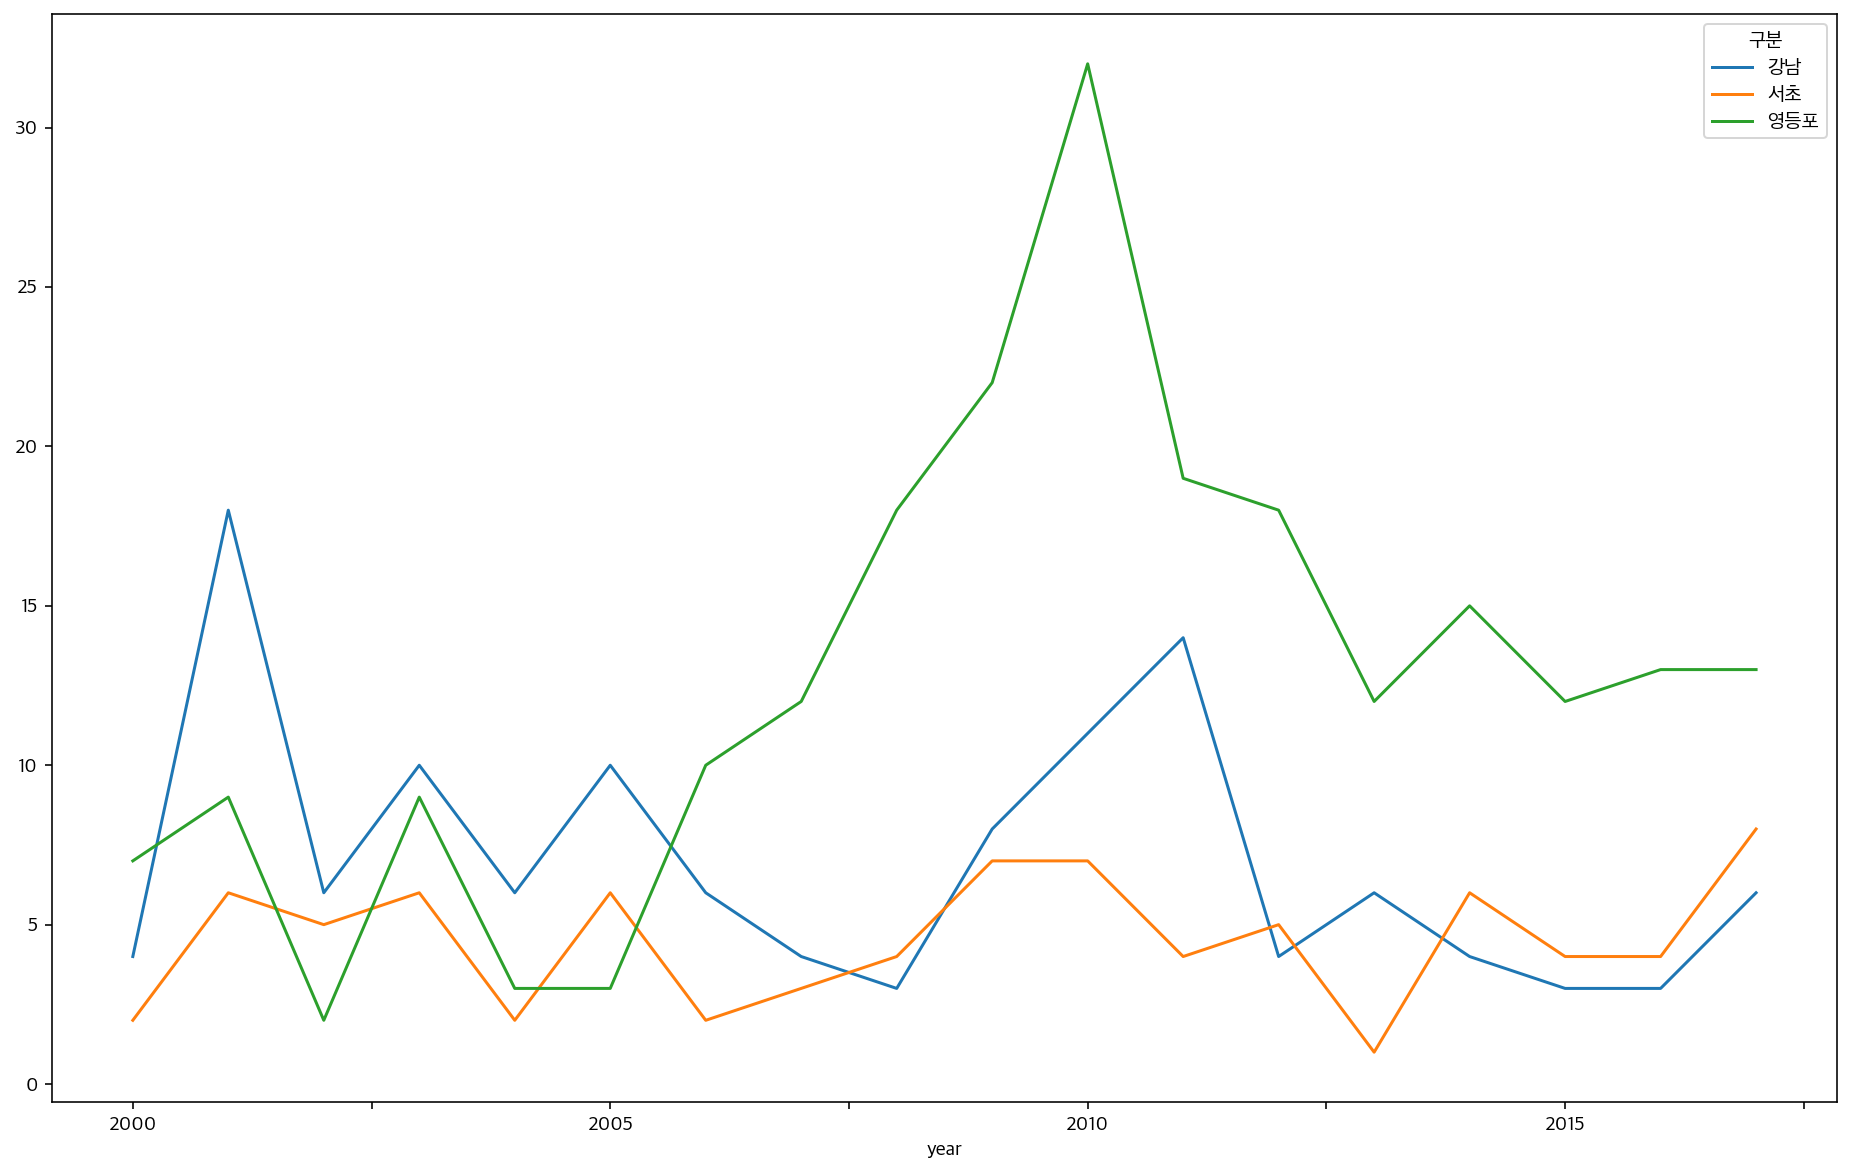

In [30]:
crime_total_murder[['강남','서초','영등포']].plot(figsize=(16,10));

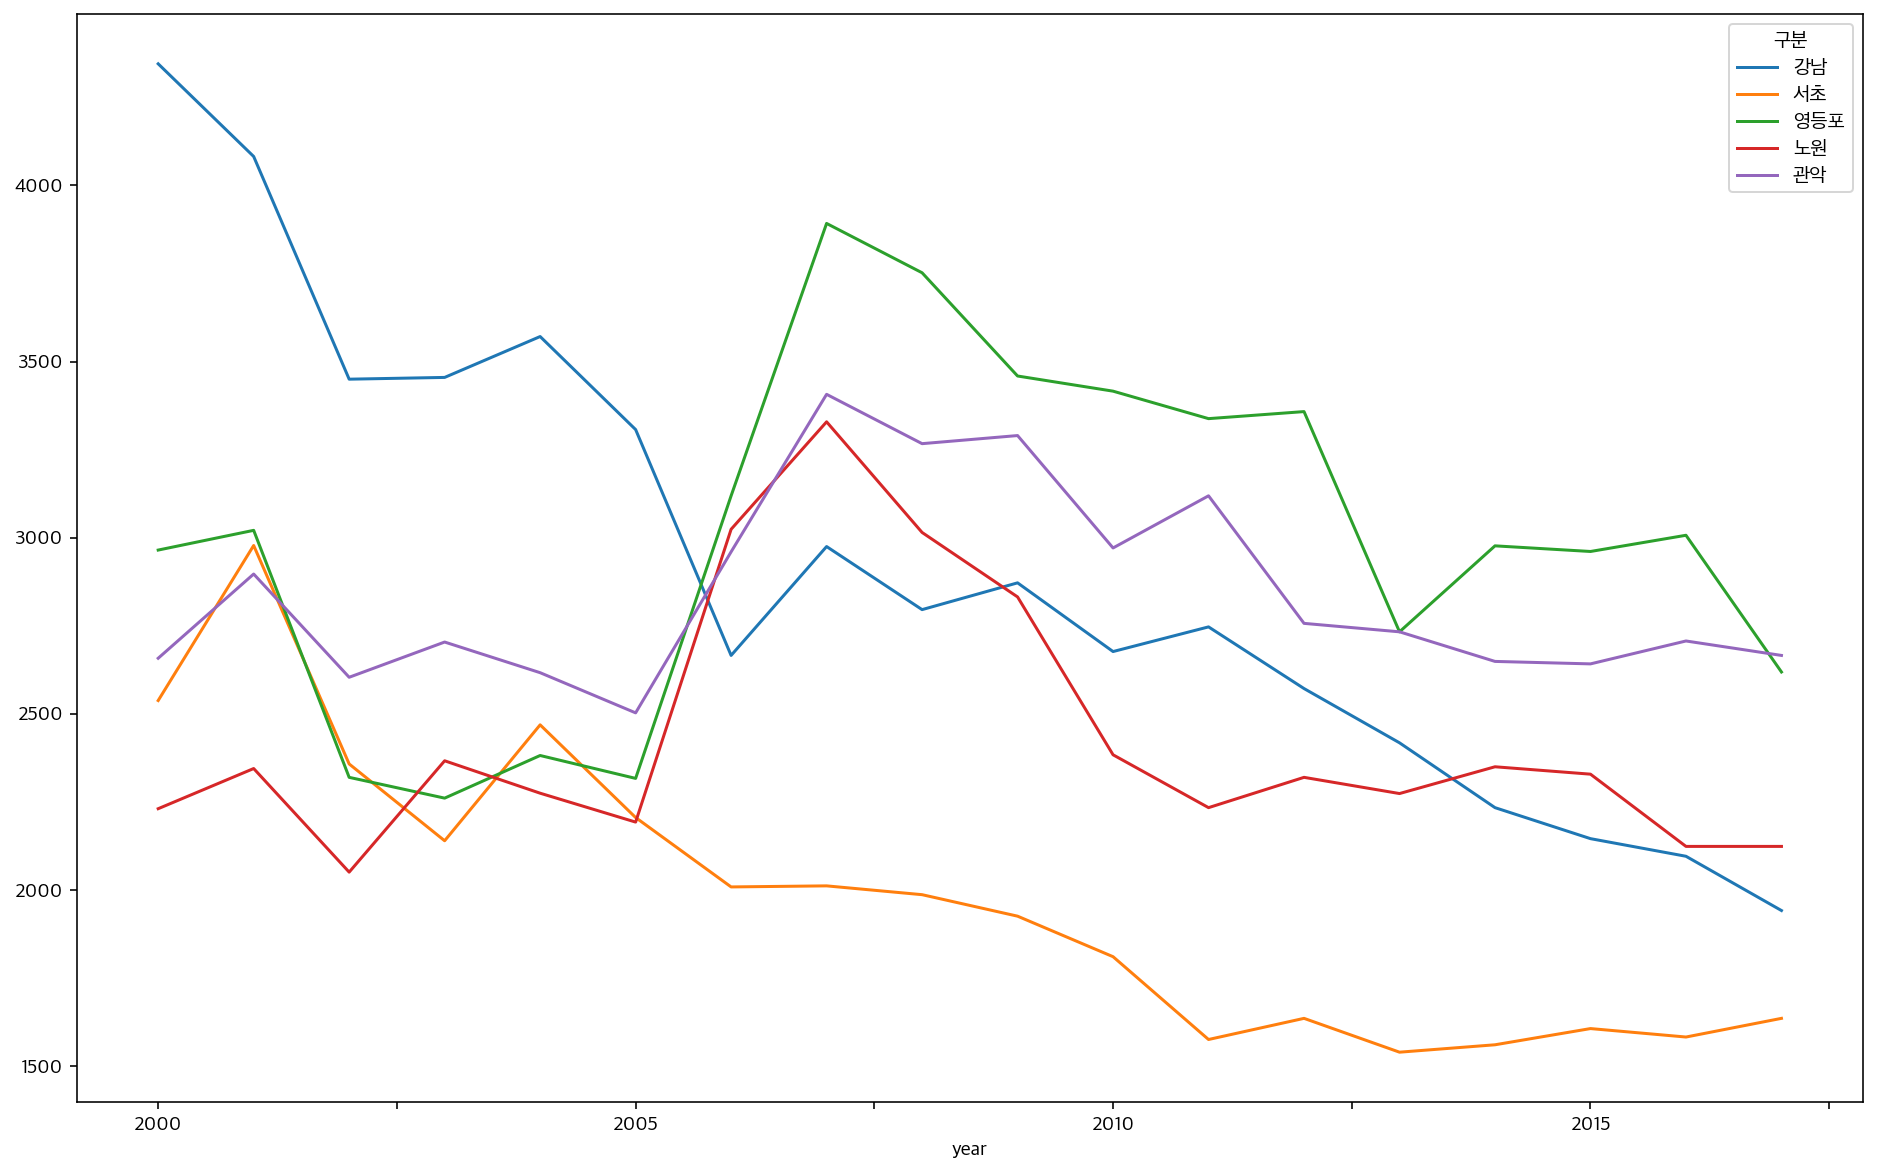

In [31]:
crime_total_violence = crime_total.pivot('year', '구분', '폭력')
crime_total_violence[['강남','서초','영등포','노원','관악']].plot(figsize = (16,10));

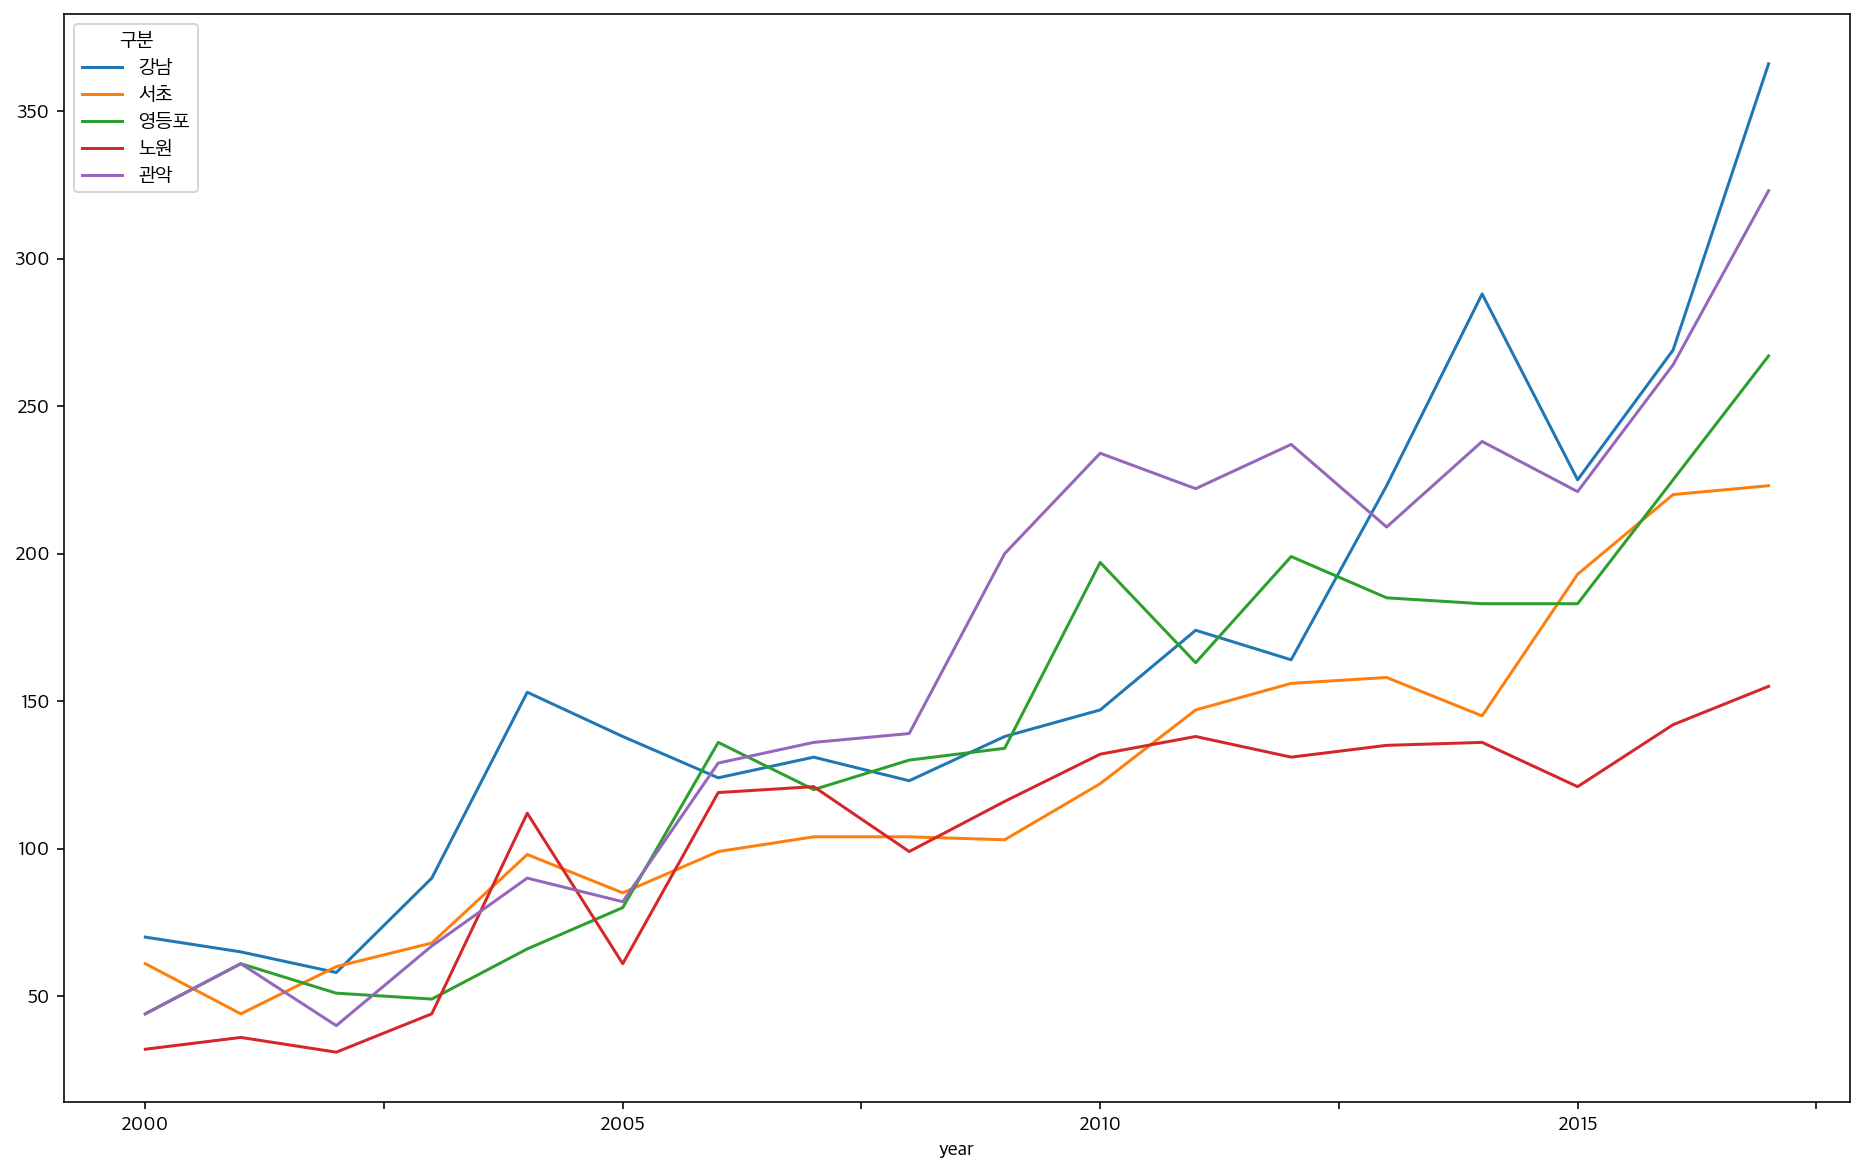

In [32]:
crime_total_sexual = crime_total.pivot('year', '구분', '강간')
crime_total_sexual[['강남','서초','영등포','노원','관악']].plot(figsize = (16,10));